![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

### Integrantes:
- Jesus Alberto Parada Perez
- Jorge Esteban Caballero
- Diana Villalba
- Juan Jose Ovalle

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import Ridge
from sklearn import metrics
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<AxesSubplot:>

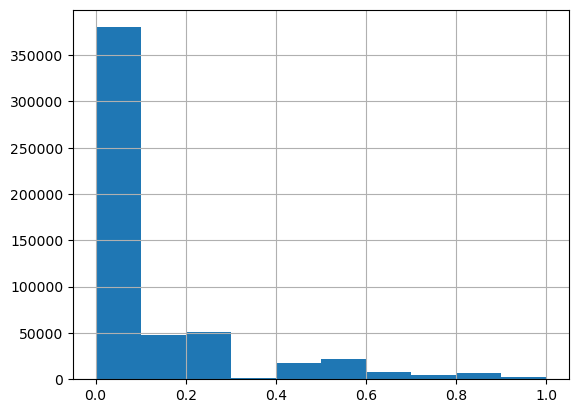

In [4]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [5]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [6]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [7]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [8]:
# Celda 1
# Tokenizar los comentarios
vectorizer_1 = CountVectorizer()
X_train_1 = vectorizer_1.fit_transform(X_train)
X_test_1 = vectorizer_1.transform(X_test)

# Entrenar el modelo de regresión Ridge
lr = Ridge(positive=True, random_state=1399)
lr.fit(X_train_1, y_train)

# Predecir probabilidades y evaluar el desempeño usando MSE
y_pred_1 = lr.predict(X_test_1)
mse_1 = metrics.mean_squared_error(y_test, y_pred_1)
print(f'MSE en test usando CountVectorizer: {mse_1}')

y_pred_1_train = lr.predict(X_train_1)
mse_1_train = metrics.mean_squared_error(y_train, y_pred_1_train)
print(f'MSE en train usando CountVectorizer: {mse_1_train}')

MSE en test usando CountVectorizer: 0.02418902299254611
MSE en train usando CountVectorizer: 0.023516268646163102


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [9]:
# Celda 2
# Tokenizar los comentarios usando solo trigramas i.e ngram_range=(3, 3)
vectorizer_2 = CountVectorizer(ngram_range=(3, 3))
X_train_2 = vectorizer_2.fit_transform(X_train)
X_test_2 = vectorizer_2.transform(X_test)

# Entrenar el modelo de regresión Ridge
lr2 = Ridge(positive=True, random_state=1399)
lr2.fit(X_train_2, y_train)

# Predecir probabilidades y evaluar el desempeño usando MSE
y_pred_2 = lr2.predict(X_test_2)
mse_2 = metrics.mean_squared_error(y_test, y_pred_2)
print(f'MSE en test usando CountVectorizer considerando trigramas: {mse_2}')

y_pred_2_train = lr2.predict(X_train_2)
mse_2_train = metrics.mean_squared_error(y_train, y_pred_2_train)
print(f'MSE en train usando CountVectorizer considerando trigramas: {mse_2_train}')

MSE en test usando CountVectorizer considerando trigramas: 0.038947069119538234
MSE en train usando CountVectorizer considerando trigramas: 0.0015494181572202914


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

TfidfVectorizer es una técnica de tokenización usada en el procesamiento de lenguaje natural (NLP). La técnica se basa en el cálculo de dos componentes: Term Frequency (TF) e Inverse Document Frequency (IDF). 

- El componente TF se refiere a la frecuencia de una palabra en un documento específico. Cuantas más veces aparezca una palabra en un documento, mayor será su frecuencia. La idea es que las palabras que aparecen más a menudo en un documento son más relevantes para ese documento.

$$ TF(t, d) = \frac{\text{Número de veces que el término } t \text{ aparece en el documento } d}{\text{Total de términos en el documento } d}
 $$

- El componente IDF tiene en cuenta la importancia de una palabra en todo el corpus (conjunto) de documentos. Si una palabra aparece en muchos documentos, es menos discriminativa y, por lo tanto, menos importante. La fórmula del IDF reduce el peso de las palabras comunes y aumenta el peso de las palabras raras en todo el corpus.

$$ IDF(t) = \log \frac{\text{Número de documentos}}{\text{Número de documentos que contienen el término } t}
 $$

TfidfVectorizer combina TF e IDF para asignar un peso a cada palabra en un documento. Los pesos resultantes pueden utilizarse para entrenar los modelos.

$$ TF-IDF(t, d) = TF(t, d) \times IDF(t) $$

**Ventajas en comporacion con CountVectorizer**:
- Tiene en cuenta no solo la frecuencia de las palabras en un documento específico, sino también su importancia en todo el corpus. Esto permite identificar palabras clave en un documento y mejorar la capacidad del modelo para distinguir entre documentos.
- Los pesos TF-IDF reducen la influencia de palabras comunes que no aportan mucho valor en la diferenciación de documentos, como los artículos o las preposiciones

**Desventajas en comporacion con CountVectorizer**
- Es computacionalmente más costoso que CountVectorizer debido al cálculo adicional del IDF.
- Puede ser menos efectivo cuando se trabaja con conjuntos de datos muy grandes o corpus de documentos muy diversos, donde las palabras comunes pueden tener diferentes significados en diferentes contextos

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [10]:
# Celda 4
# Tokenizar los comentarios usando TF-IDF
vectorizer_3 = TfidfVectorizer()
X_train_3 = vectorizer_3.fit_transform(X_train)
X_test_3 = vectorizer_3.transform(X_test)

# Entrenar el modelo de regresión Ridge
lr3 = Ridge(positive=True, random_state=1399)
lr3.fit(X_train_3, y_train)

# Predecir probabilidades y evaluar el desempeño usando MSE
y_pred_3 = lr3.predict(X_test_3)
mse_3 = metrics.mean_squared_error(y_test, y_pred_3)
print(f'MSE en test usando TF-IDF: {mse_3}')

# Predecir probabilidades y evaluar el desempeño usando MSE
y_pred_3_train = lr3.predict(X_train_3)
mse_3_train = metrics.mean_squared_error(y_train, y_pred_3_train)
print(f'MSE en train usando TF-IDF: {mse_3_train}')

MSE en test usando TF-IDF: 0.018062289454129018
MSE en train usando TF-IDF: 0.016435148936374922


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

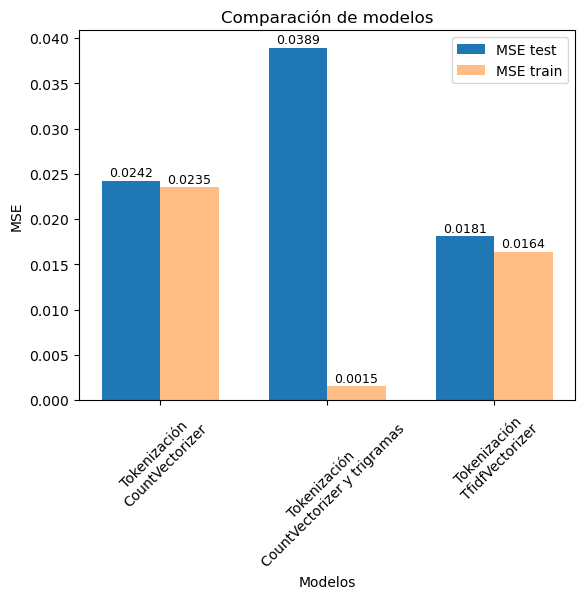

In [11]:
# Celda 5
# Etiquetas de modelos
modelos = [
    "Tokenización\nCountVectorizer",
    "Tokenización\nCountVectorizer y trigramas",
    "Tokenización\nTfidfVectorizer"
]

# MSE de modelos
mse = [round(mse_1, 4), round(mse_2, 4), round(mse_3, 4)]
mse_train = [round(mse_1_train, 4), round(mse_2_train, 4), round(mse_3_train, 4)]

# Graficar modelos
fig, ax = plt.subplots()
width = 0.35
x = np.arange(len(modelos))
ax.bar(x - width/2, mse, width=width, label='MSE test')
ax.bar(x + width/2, mse_train, width=width, alpha=0.5, label='MSE train')

for i, v in enumerate(mse):
    ax.text(i - width/2, v + 0.0005, str(v), size=9, ha='center')
    ax.text(i + width/2, mse_train[i] + 0.0005, str(mse_train[i]), size=9, ha='center')

ax.set_xlabel('Modelos')
ax.set_ylabel('MSE')
ax.set_title('Comparación de modelos')
ax.set_xticks(x)
ax.set_xticklabels(modelos, rotation=45)
ax.legend()
plt.show()


- El modelo que utiliza TfidfVectorizer para el preprocesamiento de texto presenta el mejor desempeño, con un MSE de 0.0181. Esto indica que este enfoque de preprocesamiento es más efectivo para este problema específico de predicción de toxicidad en comentarios.

- En este caso, el uso de TfidfVectorizer resulta en un mejor desempeño en comparación con los modelos que utilizan CountVectorizer con unigramas o trigramas. Esto puede deberse a que TfidfVectorizer considera la importancia de las palabras en el documento y en el corpus, lo que ayuda a identificar palabras clave y mejorar la capacidad de los modelos para distinguir entre comentarios tóxicos y no tóxicos.

- El modelo de CountVectorizer con trigramas produce mucho overfitting si comparamos el desempeño del modelo en el set de test y de train. En los otros modelos la diferencia no es tan grande como para decir que hay overfit.

In [12]:
print(f"Numero de features con (unicamente) unigramas {len(vectorizer_2.get_feature_names()):,}")
print(f"Numero de features con (unicamente) trigramas {len(vectorizer_3.get_feature_names()):,}")

Numero de features con (unicamente) unigramas 10,546,378
Numero de features con (unicamente) trigramas 141,176


Entre los modelos de CountVectorizer, el modelo de unigramas (MSE de 0.0242) tuvo un mejor desempeño que el de trigramas (MSE de 0.0389). Esto se puede deberse a que:
- Los trigramas por sí mismos pueden no capturar información suficiente para realizar predicciones precisas. Al utilizar solo trigramas, se descartan las características basadas en unigramas y bigramas que podrían ser más relevantes para predecir la toxicidad de los comentarios.
- Los trigramas pueden ser menos frecuentes en el corpus que los unigramas y bigramas. Como resultado, el modelo podría estar ajustándose a características menos frecuentes y menos representativas de la toxicidad en los comentarios.